# belosgraficos instagram.com/belosgraficos/

#### Notebook para a criação do gráfico do tipo cordilheira com a temperatura diária de Porto Alegre no ano de 2020

### Comentários estão em português - Comments are in Portuguese

## Notebook criado utilizando o Kaggle
#### Dados: https://www.kaggle.com/rodrigoriboldi/temperatura-diria-de-porto-alegre-ano-de-2020

Importando as bibliotecas necessarias para a execução do código

In [9]:
# Verifica se a biblioteca já está instanada, caso não estiver, instala a biblioteca
if("dplyr" %in% rownames(installed.packages()) == FALSE) {install.packages("dplyr")}
if("ggthemes" %in% rownames(installed.packages()) == FALSE) {install.packages("ggthemes")}
if("png" %in% rownames(installed.packages()) == FALSE) {install.packages("png")}

library(dplyr)
library(ggplot2)
library(png)
library(ggthemes)
library(tidyr)

Lendo o arquivo de dados

In [11]:
# Lendo o arquivo CSV - Atenção para o caminho do arquivo
file_path = '../input/pokemon/pokemon.csv'
dataset <- read.csv(file_path, sep = ',',stringsAsFactors = TRUE)
head(dataset)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>
1,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,2,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,3,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,4,60,50,65,fire,,8.5,1,0
5,"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,5,80,65,80,fire,,19.0,1,0
6,"['Blaze', 'Solar Power']",0.25,1,1,2.0,0.5,0.5,0.5,1,1,⋯,88.1,6,159,115,100,fire,flying,90.5,1,0


#### Vamos analisar se os pokemons ficaram mais forte com o lançamento de novas gerações do jogo, para isso iremos precisar dos dados de ataque, qual a geração, o seu número na pokedex e o nome de cada pokemon

Preparando os dados para a criação do gráfico



In [12]:
# Selecionando os dados
ds_ataque <- dataset %>%
             select(pokedex_number, 
                    name, 
                    attack, 
                    generation)

# Transformando a geração de um valor numérico para um fator
ds_ataque$generation <- as.factor(ds_ataque$generation)

# Verificando o novo dataset
head(ds_ataque)

,pokedex_number,name,attack,generation
,<int>,<fct>,<int>,<fct>
1,1,Bulbasaur,49,1
2,2,Ivysaur,62,1
3,3,Venusaur,100,1
4,4,Charmander,52,1
5,5,Charmeleon,64,1
6,6,Charizard,104,1


Criando o gráfico

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

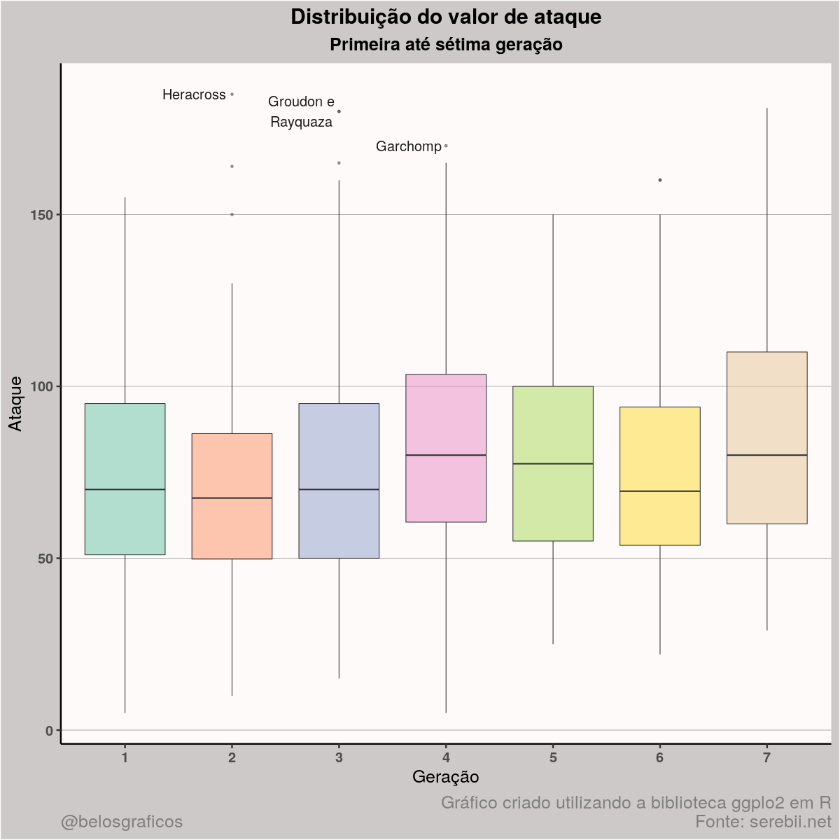

In [13]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "pokemon-attack-generation-ggplot2.png"
fig_width = 1200
fig_height = 1200

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(ds_ataque, aes(x = generation,
                      y = attack,
                      fill = generation)) +
  
  # Adicionando camada: Boxplot
  geom_boxplot(alpha = 0.5) + 

  # Definindo o tema
  theme_classic(base_size = 25) +
  
  # Definindo a paletta de cores
  scale_fill_brewer(palette="Set2") +
  
  # Mudando definições dentro do tema de acordo com o gráfico
  theme(legend.position = "none", # Remove a legenda
        
        # Título dos eixos em negrito
        axis.text.x = element_text(face = "bold"), 
        axis.text.y = element_text(face = "bold"),
        
        # Título e subtitulo do gráfico centralizados e em negrito
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5, face = "bold"),
        
        # Cores de fundo da figura e da área do gráfico
        plot.background = element_rect(fill = "snow3"),
        panel.background = element_rect(fill = "snow1"),
        
        # Definições das linhas de grade
        panel.grid.major = element_line(size = 0.3, linetype = 'solid', colour = "grey50"),
        panel.grid.minor = element_blank(),
        panel.grid.major.x = element_blank(),
        
        # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
        plot.caption = element_text(color = 'gray50', hjust = c(0,1), size = 25)) +
  
  # Definindo os labels
  labs(x = "Geração", 
       y = "Ataque", 
       title = "Distribuição do valor de ataque",
       subtitle = "Primeira até sétima geração",
       caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nFonte: serebii.net")) +
  
  # Anotação com texto para identificar qual é o pokémon daquele ponto
  annotate("text",
       x = 1.65, y = 185,
       label = "Heracross",
       color = "gray10",
       size = 7) +
  # Anotação com texto para identificar qual é o pokémon daquele ponto
  annotate("text",
       x = 2.65, y = 180,
       label = "Groudon e\nRayquaza",
       color = "gray10",
       size = 7) +
  # Anotação com texto para identificar qual é o pokémon daquele ponto
  annotate("text",
       x = 3.65, y = 170,
       label = "Garchomp",
       color = "gray10",
       size = 7)
  
# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)

#### Criando o gráfico auxiliar - Interpretando um boxplot

Preparando os dados

In [14]:
# Selecionando os dados
ds_boxplot <- ds_ataque %>%
              filter(generation == 2)

# Transformando a geração de um valor numérico para um fator
ds_boxplot$generation <- as.factor(ds_boxplot$generation)

# Verificando o novo dataset
head(ds_boxplot)

,pokedex_number,name,attack,generation
,<int>,<fct>,<int>,<fct>
1,152,Chikorita,49,2
2,153,Bayleef,62,2
3,154,Meganium,82,2
4,155,Cyndaquil,52,2
5,156,Quilava,64,2
6,157,Typhlosion,84,2


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

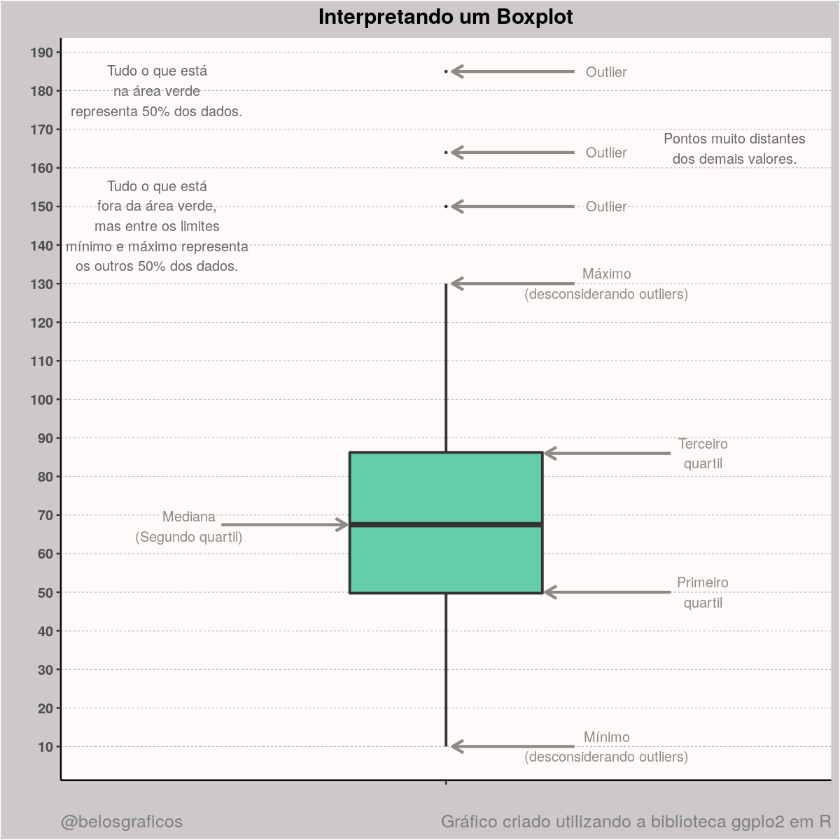

In [15]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "interpretando-box-plot-ggplot2.png"
fig_width = 1200
fig_height = 1200

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)


# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(ds_boxplot, aes(x = generation,
                       y = attack,
                       fill = generation)) +
  
  # Adicionando camada: Boxplot
  geom_boxplot(alpha = 1,width = 0.3, fill = 'aquamarine3',lwd = 1.8) +

  # Definindo o tema
  theme_classic(base_size = 25) +
  
  # Definindo o tamanho do eixo Y
  scale_y_continuous(breaks = seq(0,200,by = 10)) +
  
  # Mudando definições dentro do tema de acordo com o gráfico
  theme(legend.position = "none", # Remove a legenda
        
        # Título dos eixos em negrito
        axis.text.x = element_blank(),
        axis.text.y = element_text(face = "bold"),
        
        # Título e subtitulo do gráfico centralizados e em negrito
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5, face = "bold"),
        
        # Cores de fundo da figura e da área do gráfico
        plot.background = element_rect(fill = "snow3"),
        panel.background = element_rect(fill = "snow1"),
        
        # Definições das linhas de grade
        panel.grid.major = element_line(size = 0.3, linetype = 'dashed', colour = "grey50"),
        panel.grid.minor = element_blank(),
        panel.grid.major.x = element_blank(),
        
        # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
        plot.caption = element_text(color = 'gray50', hjust = c(0,1), size = 25)) +
  
  # Definindo os labels  
  labs(x = "", 
       y = "", 
       title = "Interpretando um Boxplot",
       caption = c("@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R")) +
  

  # Anotação com texto para identificar os outliers
  annotate("text",
       x = 1.25, y = c(185, 150, 164),
       label = "Outlier",
       color = "ivory4",
       size = 7) +
  
  # Anotação com segmento e seta para identificar os outliers
  annotate("segment", 
           x = c(1.2,1.2,1.2), 
           y = c(150,164,185), 
           xend = c(1.01,1.01,1.01), 
           yend = c(150,164,185), 
           colour = "ivory4", size=2, 
           alpha=1, 
           arrow=arrow()) +
  
  # Anotações com texto e segmentos para identificar pontos do gráfico
  annotate("text",
       x = 1.25, y = 130,
       label = "Máximo\n(desconsiderando outliers)",
       color = "ivory4",
       size = 7) +
  annotate("segment", 
           x = 1.2, 
           y = 130, 
           xend = 1.01, 
           yend = 130, 
           colour = "ivory4", size=2, 
           alpha=1, 
           arrow=arrow()) +
  
  annotate("text",
       x = 1.25, y = 10,
       label = "Mínimo\n(desconsiderando outliers)",
       color = "ivory4",
       size = 7) +
  annotate("segment", 
           x = 1.2, 
           y = 10, 
           xend = 1.01, 
           yend = 10, 
           colour = "ivory4", size=2, 
           alpha=1, 
           arrow=arrow()) +
  
  annotate("text",
       x = 1.4, y = 86,
       label = "Terceiro\nquartil",
       color = "ivory4",
       size = 7) +
  annotate("segment", 
           x = 1.35, 
           y = 86, 
           xend = 1.155, 
           yend = 86, 
           colour = "ivory4", size=2, 
           alpha=1, 
           arrow=arrow()) +
  
  annotate("text",
       x = 1.4, y = 50,
       label = "Primeiro\nquartil",
       color = "ivory4",
       size = 7) +
  annotate("segment", 
           x = 1.35, 
           y = 50, 
           xend = 1.155, 
           yend = 50, 
           colour = "ivory4", size=2, 
           alpha=1, 
           arrow=arrow()) +

  annotate("text",
       x = 0.6, y = 67,
       label = "Mediana\n(Segundo quartil)",
       color = "ivory4",
       size = 7) +
  annotate("segment", 
           x = 0.65, 
           y = 67.5, 
           xend = 0.845, 
           yend = 67.5, 
           colour = "ivory4", size=2, 
           alpha=1, 
           arrow=arrow()) +
  
  # Textos explicativos
  annotate("text",
       x = 0.55, y = 180,
       label = "Tudo o que está\nna área verde\nrepresenta 50% dos dados.",
       color = "gray40",
       size = 7) +
  annotate("text",
       x = 0.55, y = 145,
       label = "Tudo o que está\nfora da área verde,\nmas entre os limites\nmínimo e máximo representa\nos outros 50% dos dados.",
       color = "gray40",
       size = 7) +
  
    annotate("text",
       x = 1.45, y = 165,
       label = "Pontos muito distantes\ndos demais valores.",
       color = "gray40",
       size = 7)
  
  
# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)